# DataSet

The dataset comes from the **University of California, Irvine's Machine Learning repository**, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to **predict whether the client will subscribe (1/0) to a term deposit (variable y).**

# Importing Libraries

In [ ]:
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
from sklearn import preprocessing  # scikit-learn's preprocessing module for data preprocessing
import matplotlib.pyplot as plt  # Matplotlib for data visualization
plt.rc("font", size=14)  # Set the default font size for Matplotlib

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.model_selection import train_test_split  # A function to split data into training and testing sets

# Import Seaborn for data visualization
import seaborn as sns
sns.set(style="white")  # Set the default Seaborn style to white
sns.set(style="whitegrid", color_codes=True)  # Enable a white grid style for Seaborn

# Loading and Exploration of the Data

The dataset has **17 columns,** **16** features and one target variable (y).
There are **45211** records/rows/samples of data available in this dataset.

The list of columns are printed below.

In [ ]:
# load data from a CSV file with a semicolon separator
data = pd.read_csv('/content/bank-full.csv', sep=';')

# Remove rows with missing values (NaN or null values)
data = data.dropna()

# Print the dimensions (number of rows and columns) of the cleaned dataset
print(data.shape)

# Print the list of column names in the dataset
print(list(data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


# Data Cleaning & Preprocessing

Deleting some of the un-necessary columns, and printing the list of columns once again for better visualization

In [ ]:
# List of columns to delete
columns_to_delete = ['contact', 'day', 'month']

# Delete the specified columns
data = data.drop(columns=columns_to_delete, axis=1)

# Print the dimensions after removing columns
print(data.shape)

# Print the updated list of column names
print(list(data.columns))

(45211, 14)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


# Exploratory Data Analysis

Printing first five rows of the data to just have a glimpse for better understanding

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


# Graphical Visualizations

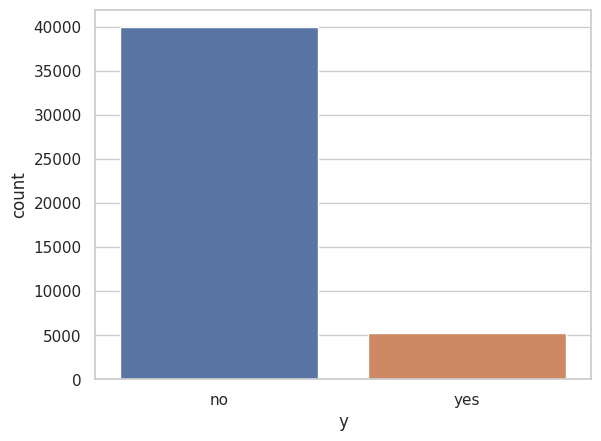

In [ ]:
# Plot 'y' for counts
sns.countplot(x='y', data=data)
plt.show()

From 45000, rows of the data almost, 40,000 customers have not subscribed for the term deposit while only 5000 have already subscribed for the term deposit.

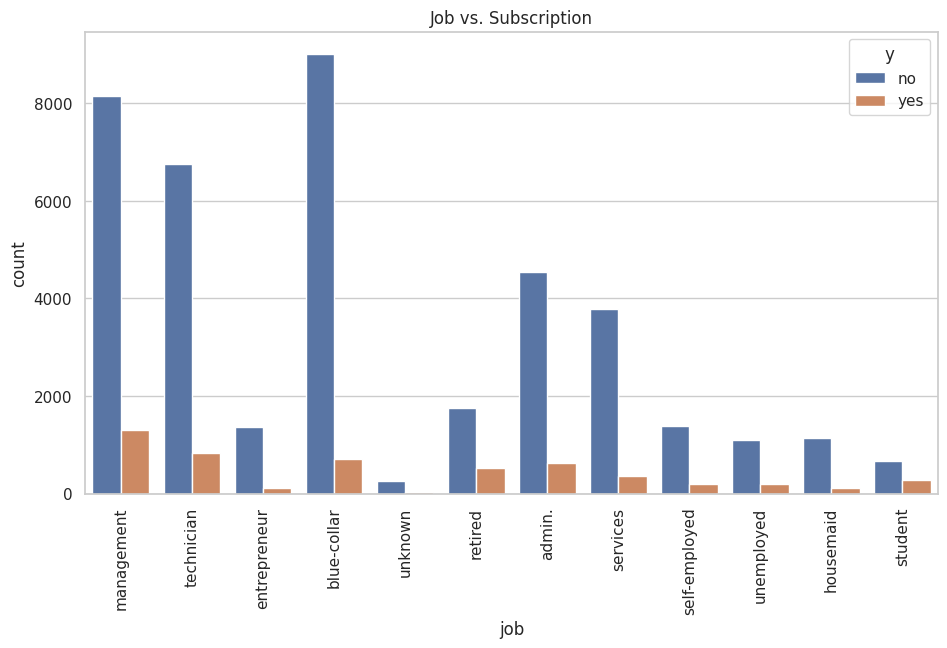

In [ ]:
# Plot 'y' for job
plt.figure(figsize=(11, 6))
sns.countplot(x='job', hue='y', data=data)
plt.title('Job vs. Subscription')
plt.xticks(rotation=90)
plt.show()

plotting the target variable against the **job** feature/var, it seams that, the most of the customers which have management job have subscribed for the term deposit.

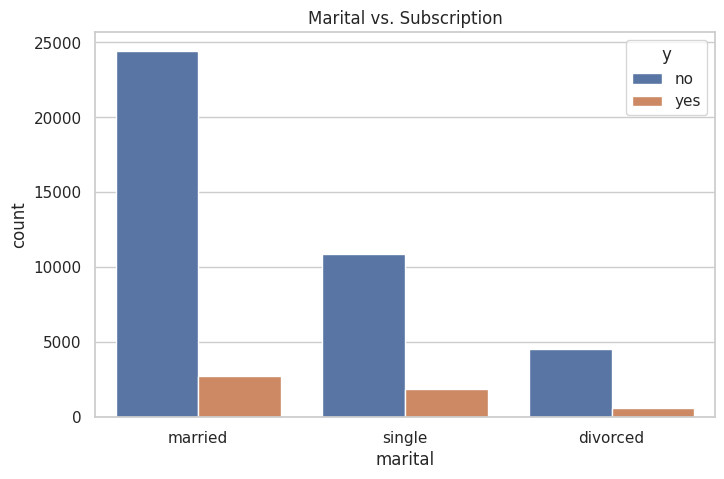

In [ ]:
# Create bar plots for marital vs. y
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=data)
plt.title('Marital vs. Subscription')
plt.show()

There is not much difference between single and married people, in case of term deposit in the bank, but they there is a significant no of divorced customers which haven't subscribed for the term deposit.

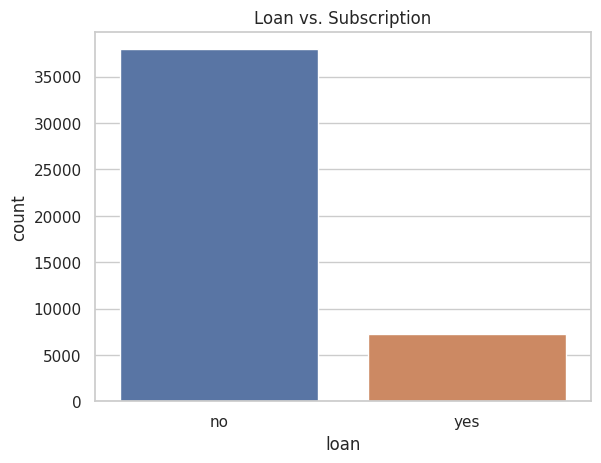

In [ ]:
# Plot 'y' for loan with horizontal bars
sns.countplot(x='loan', data=data)
plt.title("Loan vs. Subscription")
plt.show()

From 40,000 customers who have personal loan, only 6000, almost have subscribed for the term deposit.

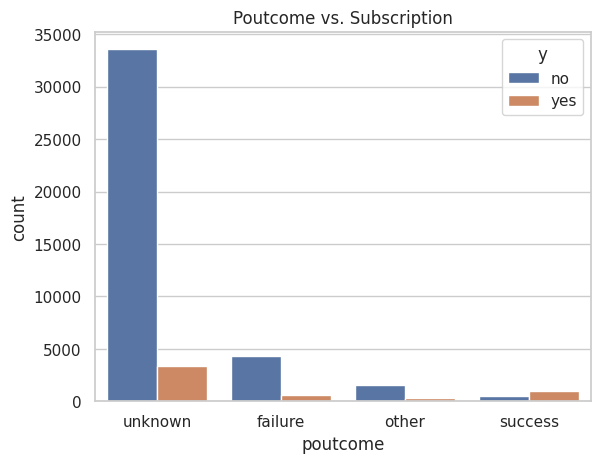

In [ ]:
# Plot 'y' for poutcome
sns.countplot(x='poutcome', hue='y', data=data)
plt.title("Poutcome vs. Subscription")
plt.show()

In [ ]:
# Group data by 'y' and analyze 'job' column
data.groupby(['y', 'job']).size()

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64

The type of job appears to have a notable influence on a client's decision to subscribe to a term deposit. Job categories such as 'management' and 'technician' have a higher number of clients who subscribed ('yes') compared to categories like 'blue-collar' and 'housemaid.' This suggests that occupation can be a relevant factor in predicting subscription outcomes.

In [ ]:
# Group data by 'y' and analyze 'marital' column
data.groupby(['y', 'marital']).size()

y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64

 It indicates that a significant number of married clients chose to subscribe ('yes'), potentially suggesting the impact of marital status on subscription decisions.

In [ ]:
# Group data by 'y' and analyze 'education' column
data.groupby(['y', 'education']).size()

y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2450
     tertiary      1996
     unknown        252
dtype: int64

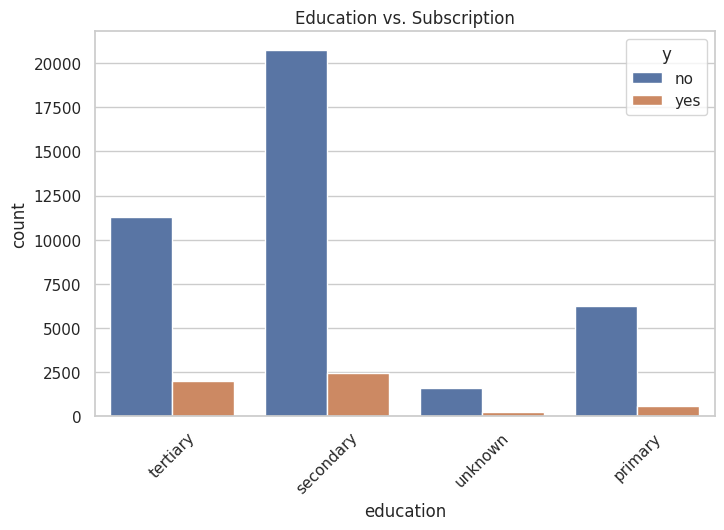

In [ ]:
# Create bar plots for education vs. y
plt.figure(figsize=(8, 5))
sns.countplot(x='education', hue='y', data=data)
plt.title('Education vs. Subscription')
plt.xticks(rotation=45)
plt.show()

It highlights that a higher proportion of clients with 'tertiary' education tend to subscribe ('yes') to a term deposit. Meanwhile, 'primary' and 'unknown' education categories show fewer subscriptions.

In [ ]:
# One-hot encoding is applied to categorical columns.
data = pd.get_dummies(data, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'], drop_first=True)

It creates binary columns (0 or 1) for each unique category within the specified columns, converting categorical data into a format suitable for machine learning models. The drop_first=True argument ensures that one category within each column serves as a reference (baseline), helping to avoid multicollinearity in the model.

In [ ]:
# Replace 'unknown' with NaN and drop columns with too many missing values
data.replace('unknown', np.nan, inplace=True)
data.dropna(axis=1, inplace=True)

In [ ]:
# Print the dimensions after removing columns
print(data.shape)

# Print the updated list of column names
print(list(data.columns))

(45211, 26)
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'default_yes', 'housing_yes', 'loan_yes', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


<ipython-input-43-ef99f0496e27>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(small_data.corr(), annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)


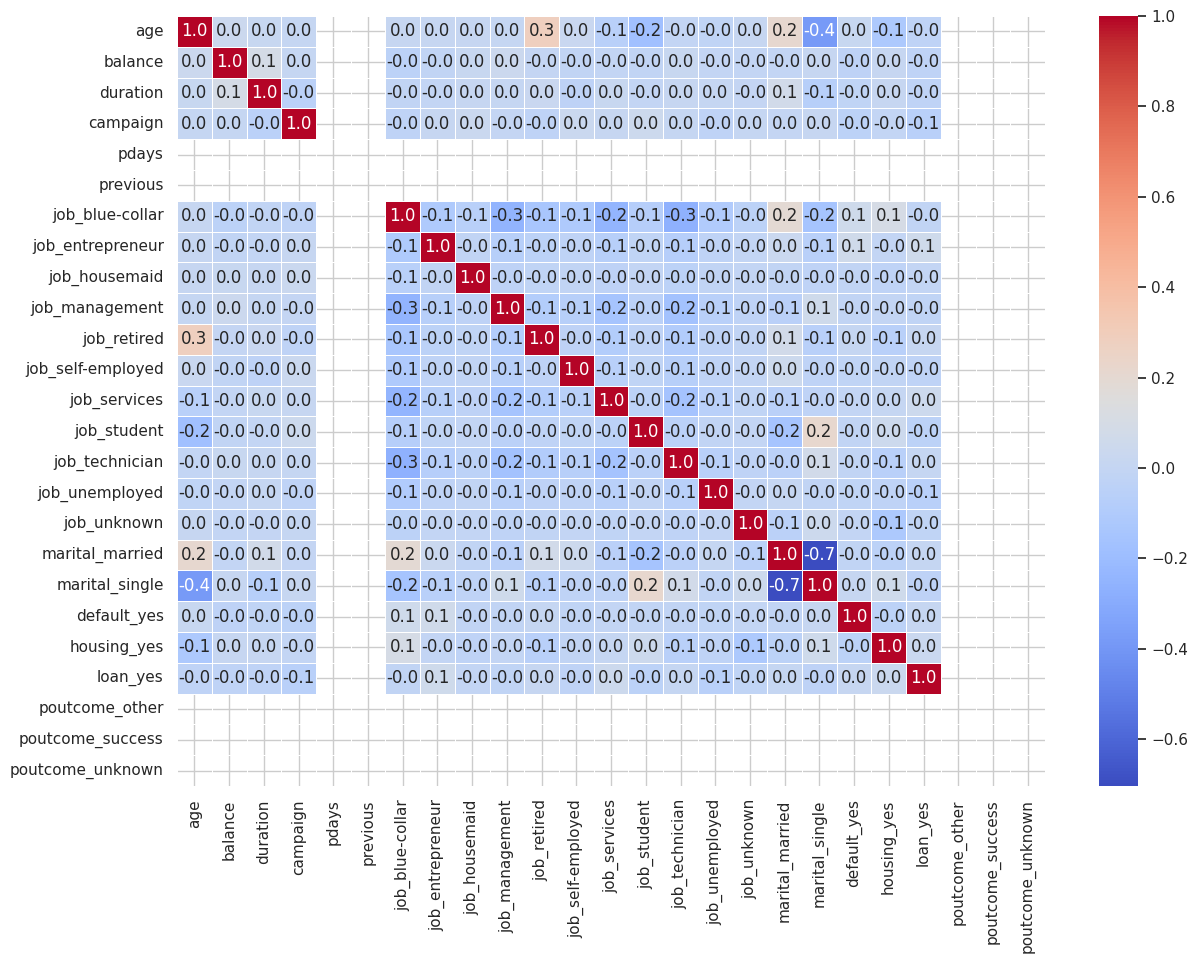

In [ ]:
# Create a smaller subset of the 'data' DataFrame using the first 1000 rows for visualization.
small_data = data.head(1000)

# Create a heatmap, The 'annot=True' parameter displays the correlation values within the heatmap cells.
# 'fmt=".1f"' formats the displayed values to one decimal place and 'cmap' sets the color map to 'coolwarm'

plt.figure(figsize=(14, 10))
sns.heatmap(small_data.corr(), annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.show()

The heatmap illustrates the correlations between different variables in the 'small_data' DataFrame. Correlations are indicated by color intensity, with positive correlations in warmer colors and negative correlations in cooler colors. The annotations within each cell of the heatmap display the correlation values with one decimal place. This visualization helps to identify relationships between variables and the strength of these relationships.

The correlation matrix heatmap shows that the off-diagonal values, which represent the correlations between variables, are predominantly close to 0 and only a few have correlations greater than 0 but less than 0.4. This pattern suggests that the variables in the dataset have weak or negligible linear correlations. As a result, it can be inferred that the variables are relatively independent of each other in terms of linear relationships.

In [ ]:
# Extract the feature matrix 'X' by dropping the target column 'y' from the 'data' DataFrame.
X = data.drop('y', axis=1)

# Extract the target variable 'y' from the 'data' DataFrame.
y = data['y']

# Split the data into training and test sets using a 80/20 split ratio.
# The 'random_state' parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Logistic Regression model instance.
model = LogisticRegression()

# Fit the model to the training data. The model learns the relationship between features (X) and the target variable (y_train).
model.fit(X_train, y_train)

# Calculate the accuracy of the model on the test data, which measures how well the model predicts the target variable.
accuracy = model.score(X_test, y_test)

# Print the model accuracy to the console.
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8893066460245493


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Summary
The logistic regression model achieved a commendable accuracy of approximately 88.93% on the test dataset, demonstrating its effectiveness in predicting the target variable. However, during training, a "ConvergenceWarning" was issued, indicating that the optimization process did not fully converge within the default maximum number of iterations.

To mitigate the convergence warning and enhance model stability, we can explore two potential solutions:

Increase the number of iterations (max_iter) when initializing the logistic regression model.
Implement data scaling techniques to aid the optimization process.